#### Breast Cancer Detection Model with Machine Learning

Modelo Classificador para detecção de Cancer de Mama.

1. Definição do Problema
    - qual o objetivo (quais perguntas queremos responder com este dataset?)
    - De onde vem o dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    - para mais detalhes consulte:.....
    - Informaçoes sonbre os atributos (listar atributos e o que cada um deles significa)
2. Carga de Dados
3. Análise de Dados
    - Estatísticas descritivas (dimensões do dataset, info, head, tail, dataset.dtypes, dataset.describe, distribuicao das classes) - colocar gráfico da distrribuição das classes
    - Histograma para cada atributo do dataset (histograma ou density plot e boxplot)
    - Matriz de correlação e scatterplot
4. Pré-processamento de dados (preparação e limpeza dos dados)
    - Tratamento de valores missing (colocar gráfico de valores missing)
    - Transformaçoes (normalizacao, padronizacao)
    - Separacao em cj de treino e teste
5. Desenvolvimento dos modelos de Classificação
    - Definição dos parâmetros de validacao cruzada
    - criação dos modelos
    - comparacao do modelos
    - Ajuste dos modelos (hiperparametros)
6. Finalizacao
    - Escolha do modelo
    - Aplicação do modelo em dados não vistos
7. Conclusão
8. Limitações

Referências:
https://thecleverprogrammer.com/2020/11/14/breast-cancer-detection-with-machine-learning/
https://colab.research.google.com/drive/1d0VtmAltEsJ0i41U0TlV1MgcV7fKAZRW#scrollTo=HDcdO4yx9db6
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset




### 1. Problem understanding
- In this project, a machine learning model was created to classify the prognosis of a breast cancer (malignant or benign) based on features computed from digitized images of breast tumors. They describe characteristics of the cell nuclei present in the images.
- Some asks could be answered in the present analysis:
    1. Which features are more influential in prognosis?
    2. Which machine learning model presents the highest accuracy in determining prognosis?
    3. What is the value of this accuracy?
- The data set used is **Breast Cancer Wisconsin (Diagnostic) Data Set** from Scikit-Learn, originally found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 
- This dataset contains 569 instances and 30 attributes.
- **Attribute Information:**
    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension (“coastline approximation” - 1)
    The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

In [44]:
# Ignore warnings:
import warnings
warnings.filterwarnings("ignore")

### 2. Load dataset:

In [1]:
# Import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms #for missing values analysis
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler #para padronização for stadarization??
from sklearn.preprocessing import MinMaxScaler # para normalização for normalization??
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Dataset loading:
data_load = load_breast_cancer()

In [3]:
# Checking feature names and target names:
print(data_load.feature_names)
print(data_load.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
# Creating a data frame with load data:
df = pd.DataFrame(data_load.data, columns = data_load.feature_names)

In [5]:
# Including diagnosis column on data frame:
df['diagnosis'] = data_load.target

In [6]:
# Show first five rows:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3. Data exploration:

In [7]:
# Showing dataset size:
df.shape

(569, 31)

In [8]:
# Showing dataset main information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Dataset statistical summary:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Checking class distribution:
# 0 - malignant
# 1 - benign
print(df.groupby('diagnosis').size())

diagnosis
0    212
1    357
dtype: int64


In [11]:
# Setting charts style:
sns.set_style("darkgrid")

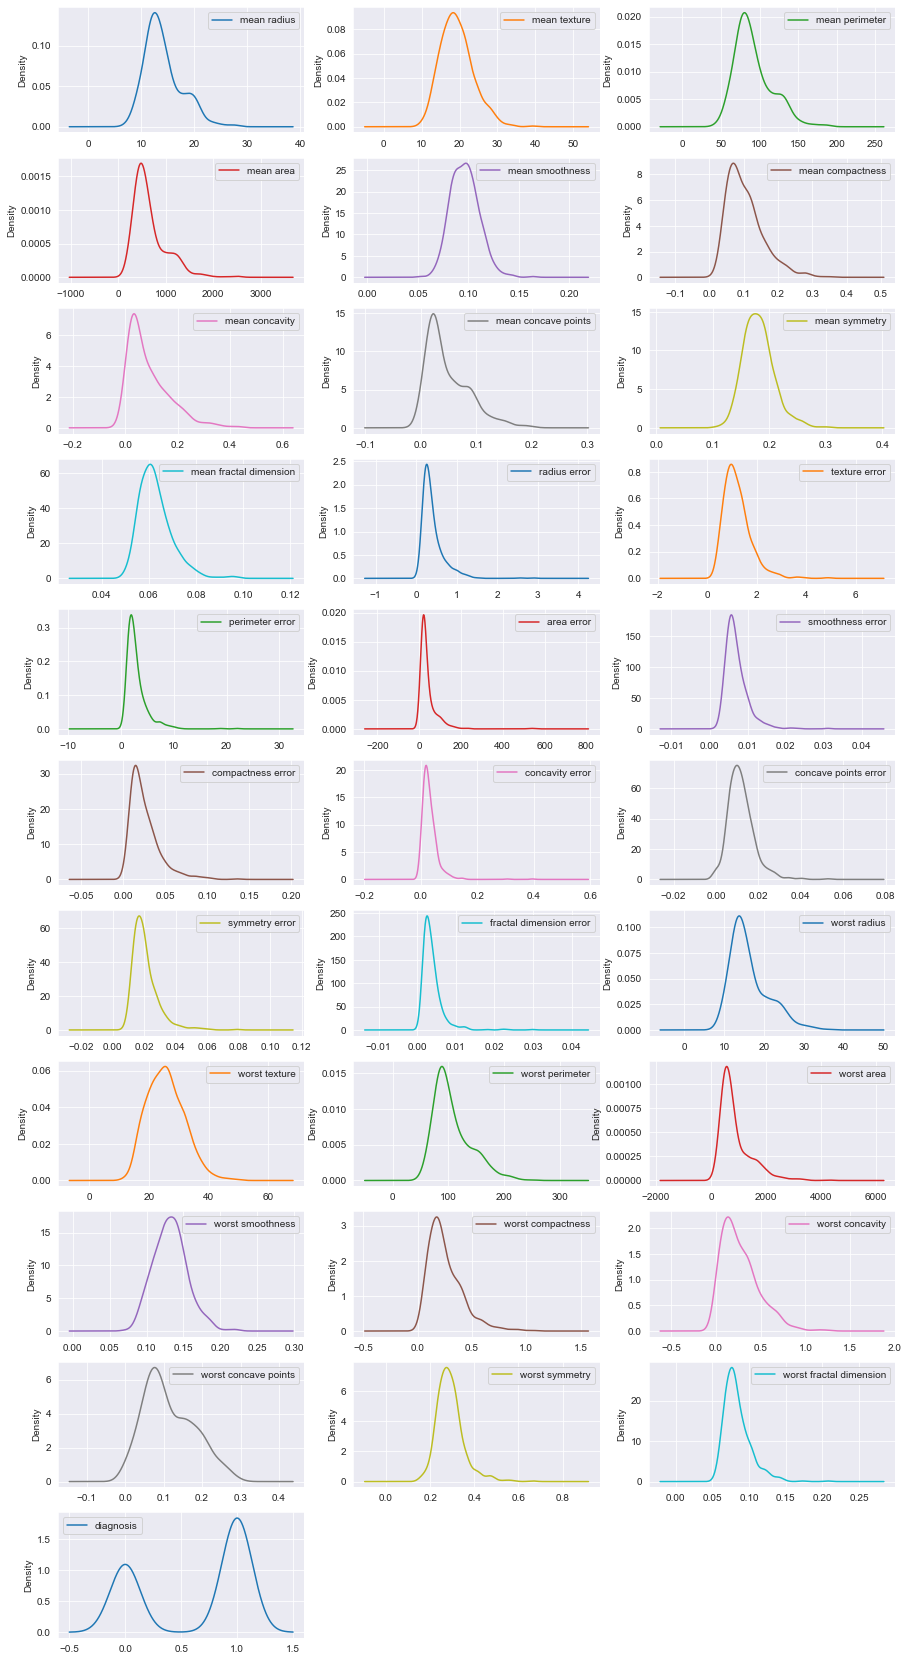

In [12]:
# Chart to verify dataset feature distribution - Density plot:
df.plot(kind='density', subplots=True, layout=(11,3), sharex=False, figsize=(15,30))
plt.show()

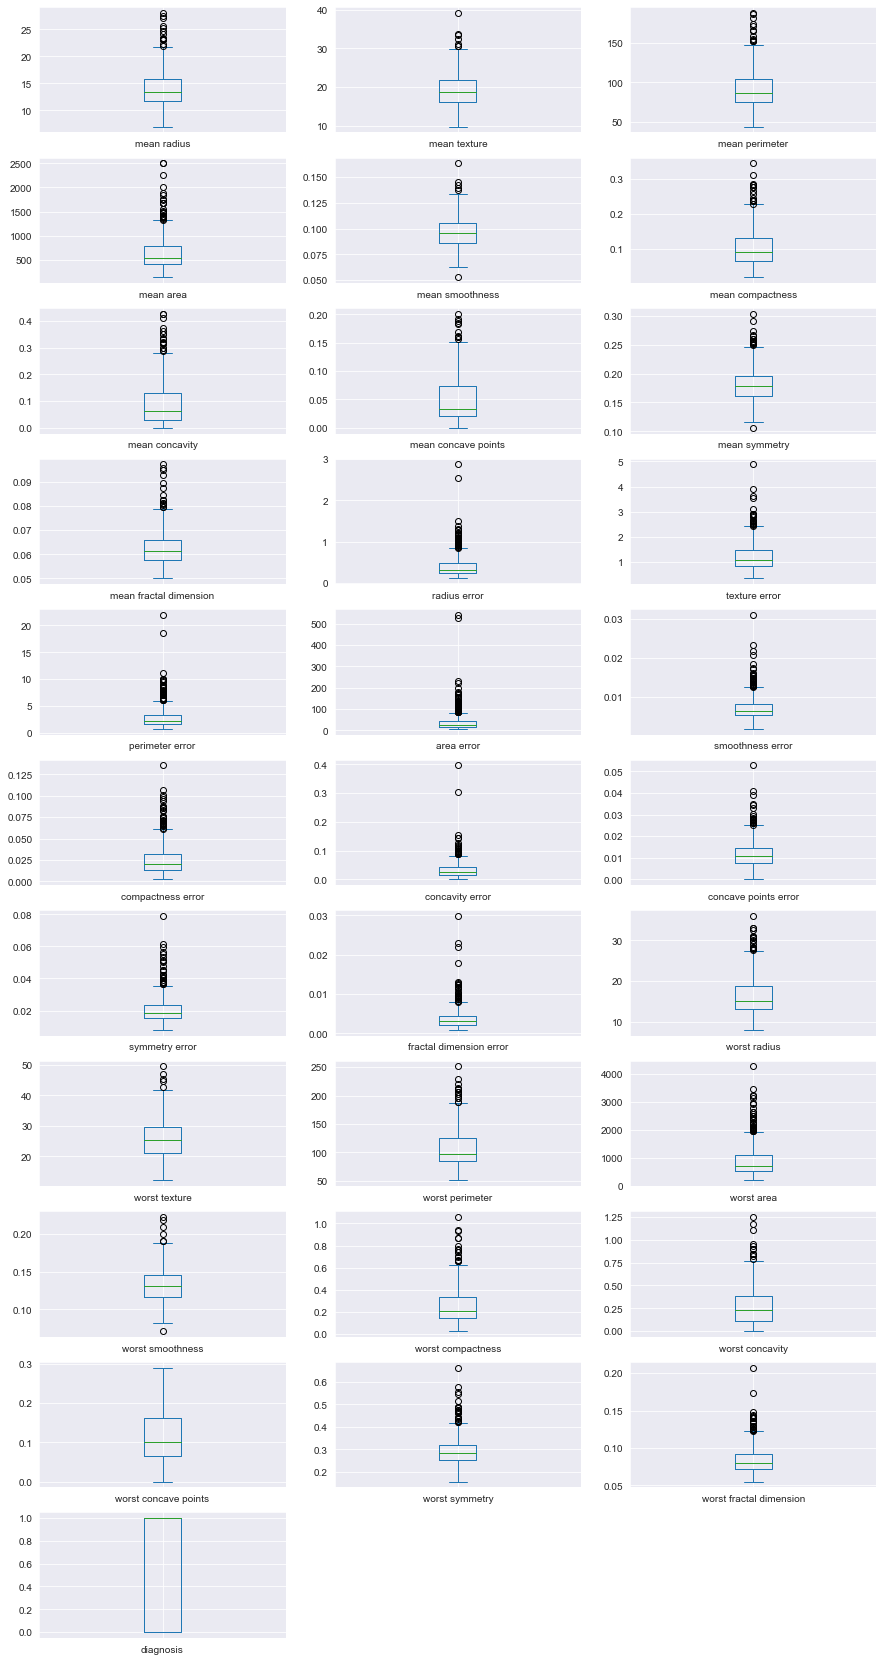

In [13]:
# Chart to verify dataset feature distribution - Boxplot:
df.plot(kind='box', subplots=True, layout=(11,3), sharex=False, sharey=False, figsize=(15,30))
plt.show();

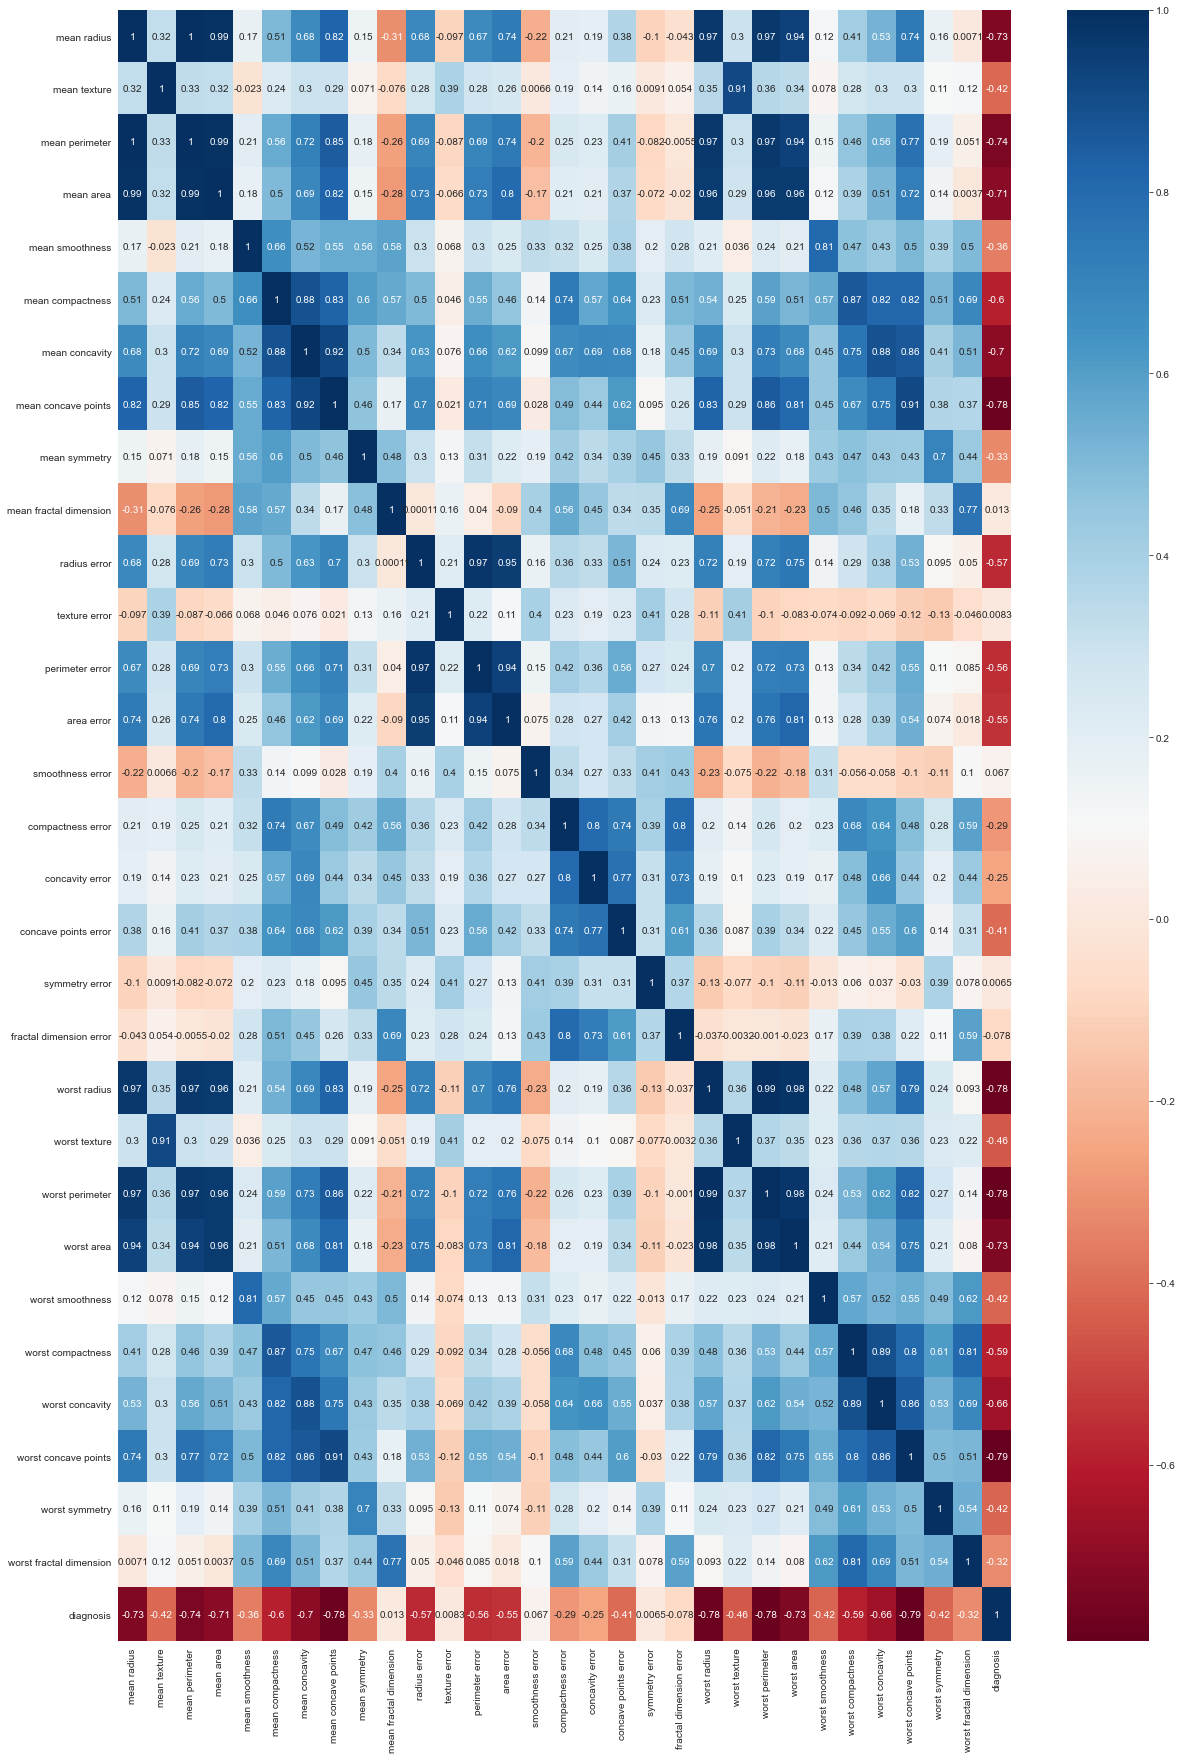

In [14]:
# Verifying Correlation Matrix:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

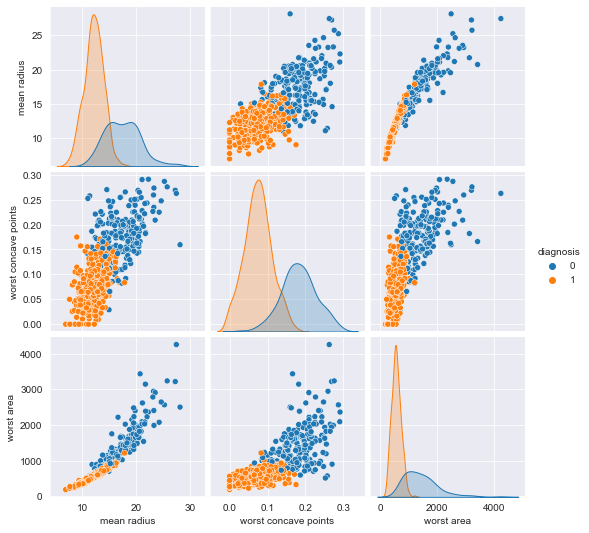

In [15]:
### VERFICAR QUAIS SÃO AS FEATURES COM CORRELACAO MAIS SIGNIFICATIVA:
# Chart to verify dataset feature correlation - Scatter plot:
sns.pairplot(df[['mean radius','worst concave points','worst area','diagnosis']],hue='diagnosis', height = 2.5);

### 4. Data Pre-Processing

4. Pré-processamento de dados (preparação e limpeza dos dados)
    - Tratamento de valores missing (colocar gráfico de valores missing)
    - Separacao em cj de treino e teste

In [16]:
# Missing value treatment:
# Verifying if dataset has missing values:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [45]:
# Creating a data frame to check missing values:
chk_missing = df.iloc[:,0:-1]
chk_missing.replace(0, np.nan, inplace=True)

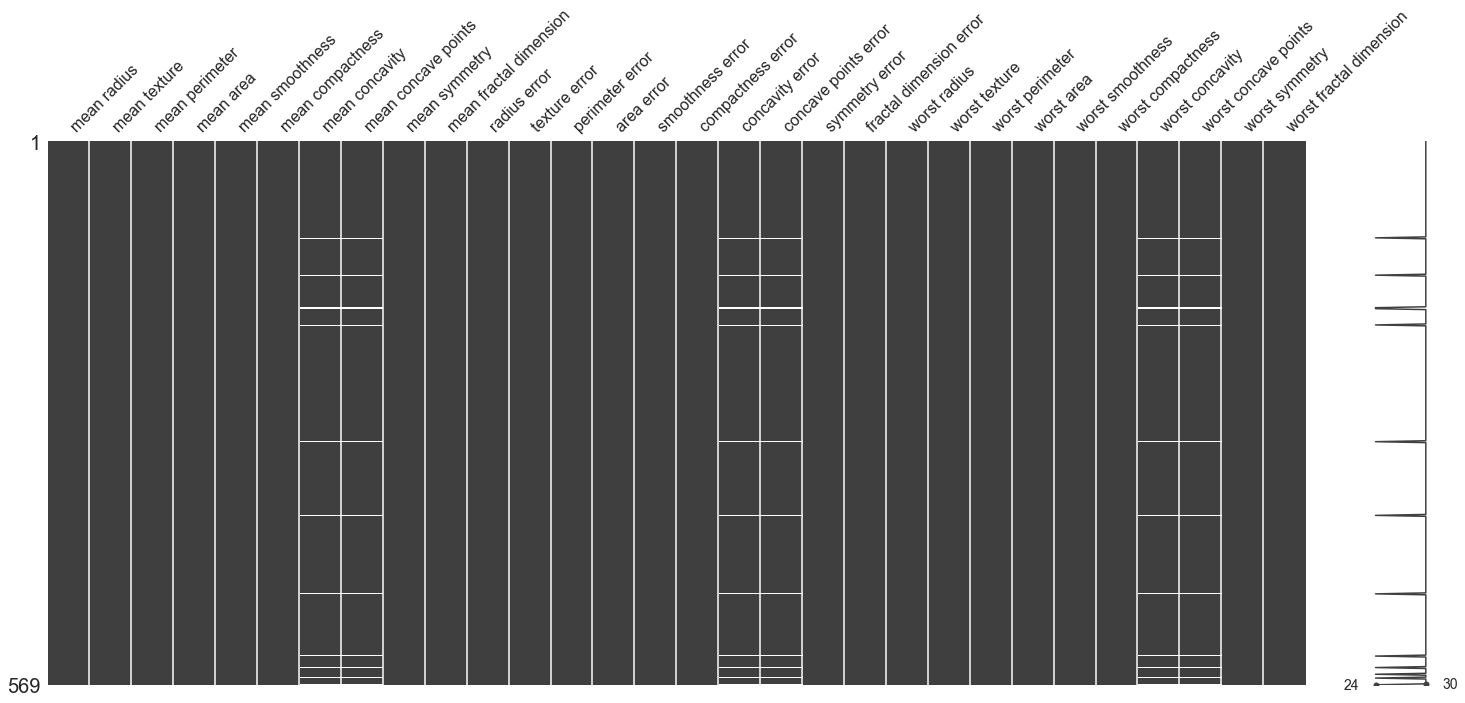

In [47]:
# Missing data visualization:
ms.matrix(chk_missing);

In [19]:
# Train and Test data split:
array = df.values
X = array[:,0:30].astype(float) #all columns except class (diagnosis)
Y = array[:,30] #only class column (diagnosis)
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)

### 5. Classification Models

5. Desenvolvimento dos modelos de Classificação
    - Definição dos parâmetros de validacao cruzada
    - criação dos modelos
    - comparacao do modelos
    - comparacao com dados padronizados e normalizados
    - Ajuste dos modelos (hiperparametros)

In [20]:
# Setting parameters:
num_folds = 10
scoring = 'accuracy'

In [21]:
# Models building:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [23]:
np.random.seed(7) # definindo uma semente global

In [72]:
# Models evaluation:
results = []
names = []
results_mean = []
standard_deviation = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  results_mean.append(cv_results.mean())
  standard_deviation.append(cv_results.std())

df_evaluation = pd.DataFrame(list(zip(results_mean, standard_deviation)), columns=['Results Mean', 'Standard Deviation'], index=names)
print(df_evaluation.to_markdown())

|      |   Results Mean |   Standard Deviation |
|:-----|---------------:|---------------------:|
| LR   |       0.951739 |            0.0320603 |
| KNN  |       0.934251 |            0.0364998 |
| CART |       0.916618 |            0.0458022 |
| NB   |       0.93628  |            0.0317516 |
| SVM  |       0.621594 |            0.0822111 |


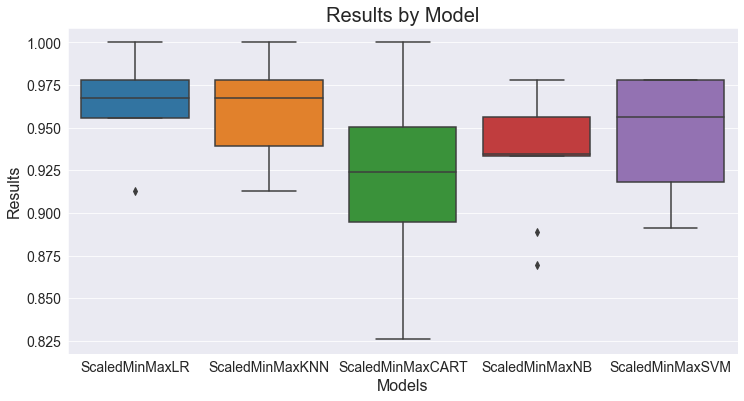

In [63]:
# Boxplot chart to compare model results:
df_results = pd.DataFrame(results).transpose()
df_results.columns = names

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_results)
plt.xlabel('Models', fontsize=16)
plt.ylabel('Results', fontsize=16)
plt.title('Results by Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14);

### Lets check if results can be improved with dataset standardize and normalization:

In [75]:
# Models building and evaluation for dataset Standardized:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results_std = []
names_std = []
results_mean_std = []
standard_deviation_std = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results_std.append(cv_results)
  names_std.append(name)
  results_mean_std.append(cv_results.mean())
  standard_deviation_std.append(cv_results.std())

df_evaluation_std = pd.DataFrame(list(zip(results_mean_std, standard_deviation_std)), columns=['Results Mean', 'Standard Deviation'], index=names_std)
print(df_evaluation_std.to_markdown())

|            |   Results Mean |   Standard Deviation |
|:-----------|---------------:|---------------------:|
| ScaledLR   |       0.973623 |            0.0290179 |
| ScaledKNN  |       0.953961 |            0.0406986 |
| ScaledCART |       0.916618 |            0.0447585 |
| ScaledNB   |       0.93628  |            0.0331427 |
| ScaledSVM  |       0.964831 |            0.0202032 |


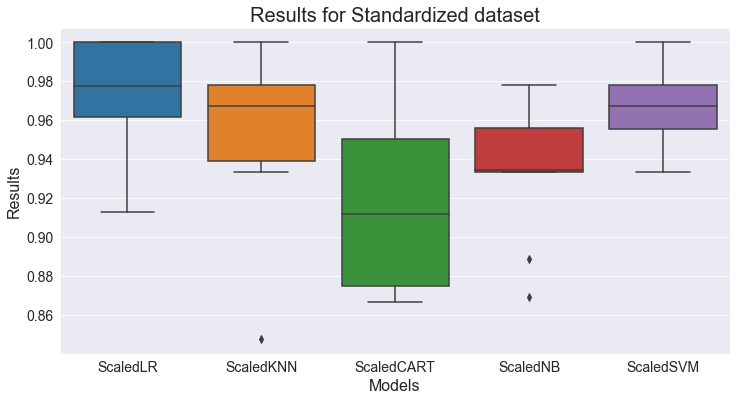

In [58]:
# Boxplot chart to compare model results for Standardized dataset:
df_results_std = pd.DataFrame(results_std).transpose()
df_results_std.columns = names_std

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_results_std)
plt.xlabel('Models', fontsize=16)
plt.ylabel('Results', fontsize=16)
plt.title('Results for Standardized dataset', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14);

In [76]:
# Models building and evaluation for Normalised dataset:
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results_norm = []
names_norm = []
results_mean_norm = []
standard_deviation_norm = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results_norm.append(cv_results)
  names_norm.append(name)
  results_mean_norm.append(cv_results.mean())
  standard_deviation_norm.append(cv_results.std())

df_evaluation_norm = pd.DataFrame(list(zip(results_mean_norm, standard_deviation_norm)), columns=['Results Mean', 'Standard Deviation'], index=names_norm)
print(df_evaluation_norm.to_markdown())

|                  |   Results Mean |   Standard Deviation |
|:-----------------|---------------:|---------------------:|
| ScaledMinMaxLR   |       0.964928 |            0.022192  |
| ScaledMinMaxKNN  |       0.962657 |            0.0278322 |
| ScaledMinMaxCART |       0.92314  |            0.0476493 |
| ScaledMinMaxNB   |       0.93628  |            0.0331427 |
| ScaledMinMaxSVM  |       0.947295 |            0.031212  |


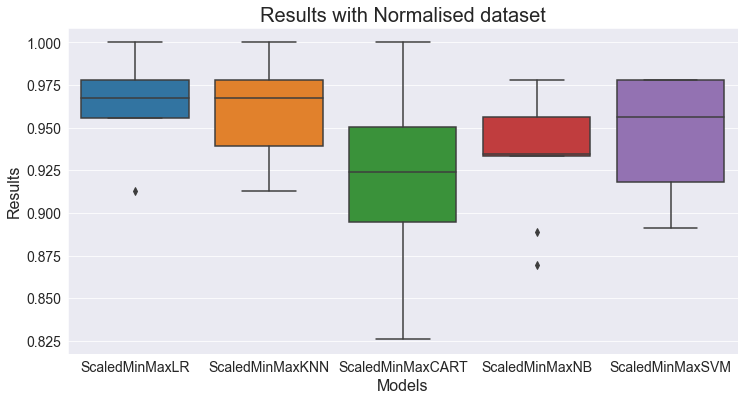

In [61]:
# Boxplot chart to compare model results for Normalised dataset:
df_results_norm = pd.DataFrame(results_norm).transpose()
df_results_norm.columns = names_norm

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df_results_norm)
plt.xlabel('Models', fontsize=16)
plt.ylabel('Results', fontsize=16)
plt.title('Results for Normalised Dataset by Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14);

In [80]:
# Creating a table to compare three kinds of dataset processing and their models results, sorting by accuracy mean from higher to lower:
df_rating = pd.concat([df_evaluation,df_evaluation_std, df_evaluation_norm])
df_rating.sort_values('Results Mean', ascending=False)

,Results Mean,Standard Deviation
ScaledLR,0.973623,0.029018
ScaledMinMaxLR,0.964928,0.022192
ScaledSVM,0.964831,0.020203
ScaledMinMaxKNN,0.962657,0.027832
ScaledKNN,0.953961,0.040699
LR,0.951739,0.032060
ScaledMinMaxSVM,0.947295,0.031212
NB,0.936280,0.031752
ScaledNB,0.936280,0.033143
ScaledMinMaxNB,0.936280,0.033143


In [81]:
# Analise de resultados e definição do modelo vencedor:

The results suggest that the better model is **ScaledLR** wich accuracy mean reaches **0.973623**. Podemos ver ainda que os dois melhores modelos são modelos de Regressão Linear, um normalizado e outro padronizado. Como a diferença entre o primeiro e segundo lugar é muito pequena, vamos testar o cj de teste com os dois primeiros modelos.

In [82]:
# Preparacao do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(solver='liblinear')
model.fit(rescaledX, Y_train)



LogisticRegression(solver='liblinear')

In [83]:
# Estimativa de acurácia no cj de teste, testando para os dois primeiros modelos

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.9824561403508771
[[38  2]
 [ 0 74]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        40
         1.0       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Preparação do modelo com TODO o dataset (e não apenas a base de treino)

In [ ]:
# Aplicacao do modelo em dados não vistos